## Lab 3.4: csvs, functions, numpy, and distributions

Run the cell below to load the required packages and set up plotting in the notebook!

In [5]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

### Sales data

For this lab we will be using a truncated version of some sales data that we will be looking at further down the line in more detail. 

The csv has about 200 rows of data and 4 columns. The relative path to the csv ```sales_info.csv``` is provided below. If you copied files over and moved them around, this might be different for you and you will have to figure out the correct relative path to enter.

In [9]:
sales_csv_path = '/Users/michael/DSI-NYC-1/curriculum/week-01/4.4-datasets-numpy/assets/datasets/sales_info.csv'

#### 1. Loading the data

Set up an empty list called ```rows```.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Beyond this, adding the rows in the csv file to the ```rows``` variable is up to you.

In [87]:
rows = []
with open(sales_csv_path, 'rU') as f:
    reader = csv.reader(f)
    for i in reader:
        rows.append(i)

##### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the list of lists, each sub-list representing a row from the csv.

Lastly, print ```header``` to see the names of the columns.

In [88]:
header = rows[0]
print header
data = rows[1::]

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']


#### 3. Create a dictionary with the data

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

In [89]:
sales_data = {}
for i in header:
    sales_data[i]=[]

for j in data:
    for k in range(len(j)):
        sales_data[header[k]].append(j[k])

In [45]:
len(header)

4

In [46]:
len(data)

200

**3.A** Print out the first 10 items of the 'volume_sold' column.

In [90]:
print sales_data['volume_sold'][0:10]

['18.4207604861', '4.77650991918', '16.6024006077', '4.29611149826', '8.15602328201', '5.00512242518', '14.60675', '4.45646649485', '5.04752965097', '5.38807023767']


#### 4. Convert data from string to float
As you can see, the data is still in string format (which is how it is read in from the csv). For each key:value pair in our ```sales_data``` dictionary, convert the values (column data) from string values to float values.

In [115]:
for j in sales_data:
    for k in range(len(data)):
        sales_data[j][k] = float(sales_data[j][k])
print sales_data


{'volume_sold': [18.4207604861, 4.77650991918, 16.6024006077, 4.29611149826, 8.15602328201, 5.00512242518, 14.60675, 4.45646649485, 5.04752965097, 5.38807023767, 9.34734863474, 10.9303977273, 6.27020860495, 12.3959191176, 4.55771189614, 4.20012242627, 10.2528698945, 12.0767847594, 3.7250952381, 3.21072662722, 6.29097142857, 7.43482131661, 4.37622478386, 12.9889127838, 11.6974557522, 5.96517512509, 3.94522273425, 7.36958530901, 7.34350882699, 12.3500273544, 8.41791967737, 10.2608361718, 7.82435369972, 10.3314300532, 12.5284878049, 18.7447505256, 6.65773264189, 10.6321289355, 6.92770422965, 6.61817422161, 7.12444444444, 9.84966032435, 11.5058377559, 6.30981315215, 10.1866219839, 10.1221793301, 10.8003469032, 7.26782845188, 10.6737166742, 9.15026865672, 8.12418187744, 6.27579970306, 10.6772953319, 5.88898828541, 10.6401714545, 4.75559643255, 10.246884068, 10.29268081, 4.41819548872, 7.10134734573, 8.00611901938, 7.79050337838, 11.1293822598, 9.34847653987, 6.31088643791, 11.6256060606, 6.

#### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept two arguments: the column name and the data associated with that column
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of the data using ```np.mean()```
    3. Print out the median of the data using ```np.median()```
    4. Print out the mode of the **rounded data** using ```stats.mode()```
    5. Print out the variance of the data using ```np.var()```
    6. Print out the standard deviation of the data using ```np.std()```
    
Remember that you will need to convert the numeric data from these function to strings by wrapping them in the ```str()``` function.

In [164]:
def roundingData(colData):
    tempRoundList = []
    for i in colData:
        tempRoundList.append(round(i))
    return tempRoundList

def printSumStat(colName,colData):
    print("Column name is " + colName)
    print("Mean is " + str(np.mean(colData)))
    print("Median is " + str(np.median(colData)))
    x = roundingData(colData)
    print("Mode is " + str(stats.mode(x)[0][0]))
    print("Variance is " + str(np.var(colData)))
    print("Standard deviation is " + str(np.std(colData)))
    

printSumStat("salesdata",sales_data['volume_sold'])

Column name is salesdata
Mean is 10.018684079
Median is 8.16634551564
Mode is 8.0
Variance is 84.1299652005
Standard deviation is 9.1722388325


**5.A** Using your function, print the summary statistics for 'volume_sold'

In [165]:
printSumStat("volume sold", sales_data['volume_sold'])

Column name is volume sold
Mean is 10.018684079
Median is 8.16634551564
Mode is 8.0
Variance is 84.1299652005
Standard deviation is 9.1722388325


**5.B** Using your function, print the summary statistics for '2015_margin'

In [166]:
printSumStat("2015 margin", sales_data['2015_margin'])

Column name is 2015 margin
Mean is 46.8588951379
Median is 36.5621438181
Mode is 35.0
Variance is 2016.06166296
Standard deviation is 44.9005753077


**5.C** Using your function, print the summary statistics for '2015_q1_sales'

In [167]:
printSumStat("2015 q1 sales", sales_data['2015_q1_sales'])

Column name is 2015 q1 sales
Mean is 154631.6682
Median is 104199.41
Mode is 4152.0
Variance is 47430301462.3
Standard deviation is 217784.989066


**5.D** Using your function, print the summary statistics for '2016_q1_sales'

In [175]:
printSumStat("2016 q1 sales", sales_data['2016_q1_sales'])

Column name is 2016 q1 sales
Mean is 154699.17875
Median is 103207.2
Mode is 3536.0
Variance is 47139411653.4
Standard deviation is 217116.124812


#### 6. Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It takes two arguments, the name of the column and the data associated with that column.

In individual cells, plot the distributions for each of the 4 columns. Do the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [170]:
def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

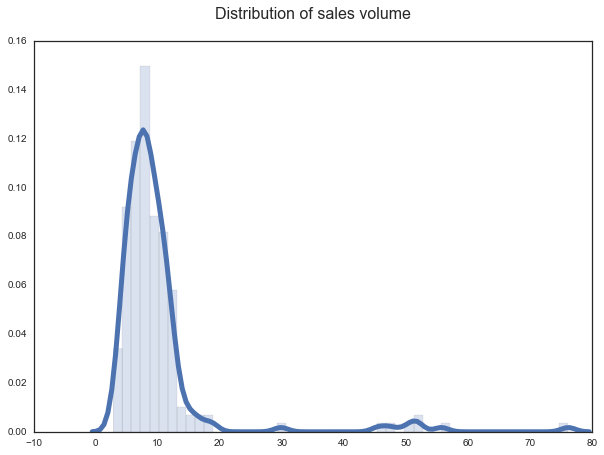

In [172]:
distribution_plotter("sales volume",sales_data['volume_sold'])

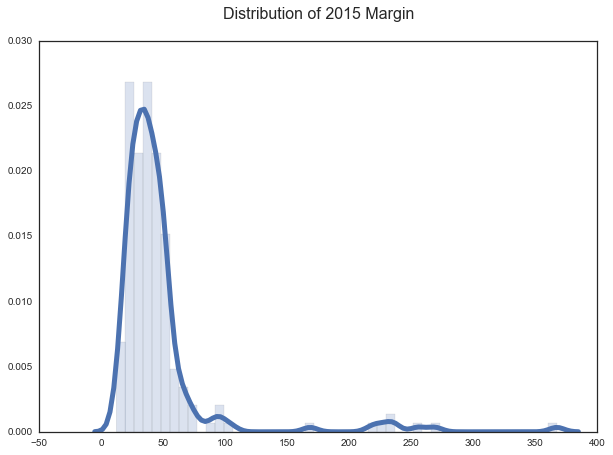

In [173]:
distribution_plotter("2015 Margin",sales_data['2015_margin'])

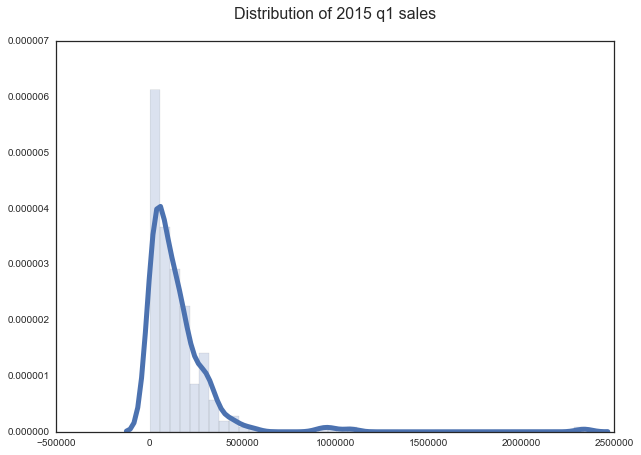

In [174]:
distribution_plotter("2015 q1 sales",sales_data['2015_q1_sales'])

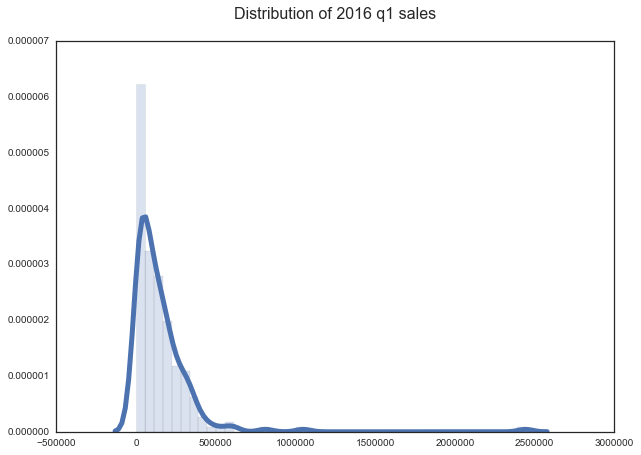

In [176]:
distribution_plotter("2016 q1 sales",sales_data['2016_q1_sales'])